# Python Model Context

MLflow’s persistence modules provide convenience functions for creating models with the pyfunc flavor in a variety of machine learning frameworks (scikit-learn, Keras, Pytorch, and more); however, they do not cover every use case. For example, you may want to create an MLflow model with the pyfunc flavor using a framework that MLflow does not natively support. Alternatively, you may want to build an MLflow model that executes custom logic when evaluating queries, such as preprocessing and postprocessing routines. Therefore, mlflow.pyfunc provides utilities for creating pyfunc models from arbitrary code and model data.

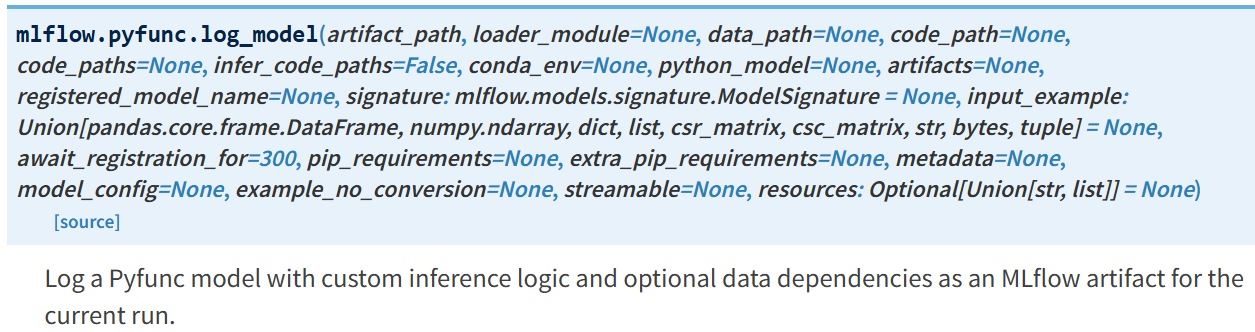





In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
import pandas as pd

In [2]:
class CustomModel(mlflow.pyfunc.PythonModel):

    def predict(self, context, model_input, params=None):
        print("Context Artifacts: ", context.artifacts)
        print("Context Model Configurations: ", context.model_config)
        return model_input.apply(lambda x: x * 2)
    
    def additional_method(self):
        print("Running an additional method")

In [3]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model("model", python_model=CustomModel())

56296fa14b114a29b4c212a37d33da9b


2025/02/01 16:07:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [4]:
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [6]:
x_new = pd.DataFrame([1, 2, 3])
prediction = loaded_model.predict(x_new)

Context Artifacts:  {}
Context Model Configurations:  None


### Model Artifacts
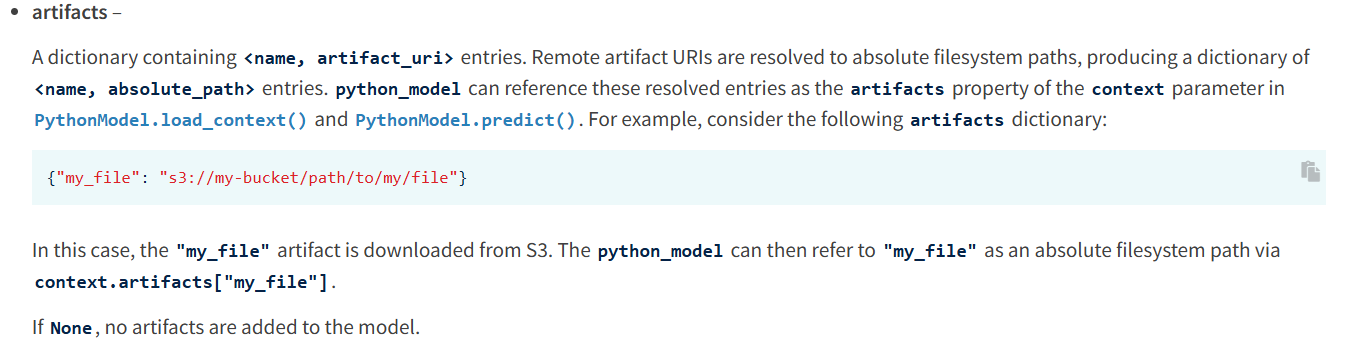

In [7]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model("model", python_model=CustomModel(), artifacts={"my_file": "/Users/manue/projects/mlflow_for_ml_dev/mlflow_for_ml_dev/utils.py"})

9bd466666b394c889878b0540695f2bc


2025/02/01 16:08:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [8]:
# load the model
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [9]:
loaded_model.predict(x_new)

Context Artifacts:  {'my_file': 'C:\\Users\\manue\\projects\\mlflow_for_ml_dev\\mlflow_for_ml_dev\\notebooks\\mlruns\\0\\9bd466666b394c889878b0540695f2bc\\artifacts\\model\\artifacts\\utils.py'}
Context Model Configurations:  None


,0
0,2
1,4
2,6


### Model Configurations
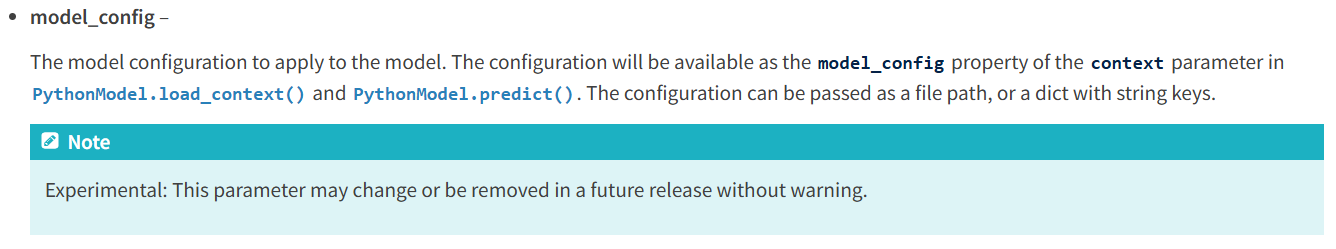

In [11]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model(
        "model",
        python_model=CustomModel(),
        model_config={"model_name": "My Custom Model"}
    )

333dfc7425064b4c95f9141c1573771f


2025/02/01 16:08:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [12]:
# load the model
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [13]:
loaded_model.predict(x_new)

Context Artifacts:  {}
Context Model Configurations:  {'model_name': 'My Custom Model'}


,0
0,2
1,4
2,6


# Load context

In [21]:
class CustomModel(mlflow.pyfunc.PythonModel):

    def predict(self, context, model_input, params=None):
        print("Getting predictions from the model {}".format(self.model_name))
        return model_input.apply(lambda x: x * 2)
    
    def additional_method(self):
        print("Running an additional method")

    def load_context(self, context):
        self.context = context
        model_name = context.model_config.get("model_name", None)
        self.model_name = model_name
        if model_name is not None:
            print(f"Model Name: {model_name}")
        


In [22]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model(
        "model",
        python_model=CustomModel(),
        model_config={"model_name": "My Custom Model"}
    )

df15cfac52fe43f395546eb839e05879


2025/02/01 16:14:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [23]:
# load the model
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

Model Name: My Custom Model


In [24]:
predictions = loaded_model.predict(x_new)

Getting predictions from the model My Custom Model
